#####NAMA : FARISYAH LUTFIAH HANIS
#####ID   : DS5H17

#IMPORT LIBRARY & DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA UNDERSTANDING

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/train_housepricing.csv')
pd.set_option('display.max_columns', 100) #agar seluruh fitur dapat terlihat
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Fitur berjumlah 81, dengan tipe data yaitu integer, float, dan char
- Total baris berjumlah 1460
- Fitur yang mengandung missing value yaitu Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

In [ ]:
# untuk melihat jumlah baris dan kolom
df.shape

(1460, 81)

In [ ]:
pd.set_option('display.max_columns', 100)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Harga rumah ini dari range 34900 sampai 755000 dengan rata-rata harga rumah 163000. Sebaran harga rumahnya yaitu right skew, terlihat dari nilai mean lebih besar mediannya, artinya data cenderung lebih banyak berkumpul pada nilai minimum.

In [ ]:
pd.set_option('display.max_columns', 43)
df.describe(include=object) #khusus tipe data object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


#DATA PREPARATION


##1. Missing Value

###Check Missing Value

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Ini merupakan daftar fitur fitur yang memiliki missing value

In [ ]:
missing_values = df.isnull().sum()/len(df)*100
print(missing_values[missing_values > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Waw, ternyata ada fitur yang missing valuenya hampir 100%😯

###Handling Missing Value

In [ ]:
#Dropping missing value
df = df.drop(['Alley','Fence','PoolQC','MiscFeature'], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Fitur fitur tersebut dihapus karena memiliki missing value lebih dari 80%

In [ ]:
# cek kembali jumlah baris dan kolom
df.shape

(1460, 77)

In [ ]:
#Imputing missing values LotFrontage
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [ ]:
#Imputing missing values LotFrontage
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

In [ ]:
#Imputing missing values GarageYrBlt
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [ ]:
#Menghitung nilai modus untuk semua kolom kategorikal
mode_values = df.select_dtypes(include='object').mode().iloc[0]

#Mengisi missing value di kolom kategorikal dengan nilai modus
df.fillna(mode_values, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Missing value sudah tidak ada lagi👍

In [ ]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

##2. Duplicates

###Check Duplicate

In [ ]:
# Check duplicate values
df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Ternyata tidak ada nilai yang duplikat😀

##3. Outliers

###SalePrice

<Axes: >

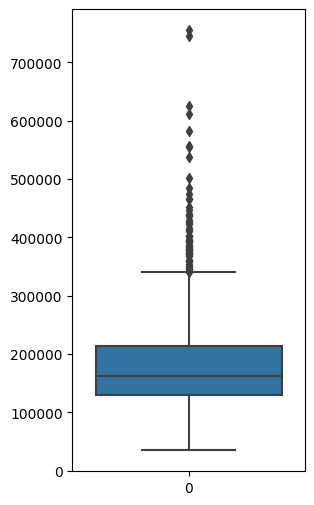

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['SalePrice'])

Pada fitur SalePrice terdapat nilai outlier diluar batas nilai maksimum

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outlier_value = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
outlier_value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.000000,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,...,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,0,7,2006,New,Partial,345000
53,54,20,RL,68.000000,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,...,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,0,11,2006,WD,Normal,385000
58,59,60,RL,66.000000,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,...,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,0,10,2006,New,Partial,438780
112,113,60,RL,77.000000,9965,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2007,2007,Gable,...,Gd,BuiltIn,2007.0,Fin,3,792,TA,TA,Y,120,184,0,0,168,0,0,10,2007,New,Partial,383970
151,152,20,RL,107.000000,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,...,Gd,Attchd,2007.0,RFn,3,866,TA,TA,Y,0,102,0,0,0,0,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,70.049958,14100,Pave,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,...,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.000000,14720,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,1.5Fin,8,5,1995,1996,Hip,...,Ex,Attchd,1996.0,Fin,3,666,TA,TA,Y,283,86,0,0,0,0,0,3,2010,WD,Normal,410000
1373,1374,20,RL,70.049958,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,...,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.000000,14892,Pave,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,...,Gd,Attchd,2006.0,Fin,3,758,TA,TA,Y,201,39,0,0,0,0,0,10,2009,WD,Normal,377500


Nilai outliersnya adalah nilai yang lebih dari upper_boundnya

In [ ]:
#hapus nilai yang outlier
df = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]

In [ ]:
#cek kembali baris dan kolom
df.shape

(1399, 77)

<Axes: >

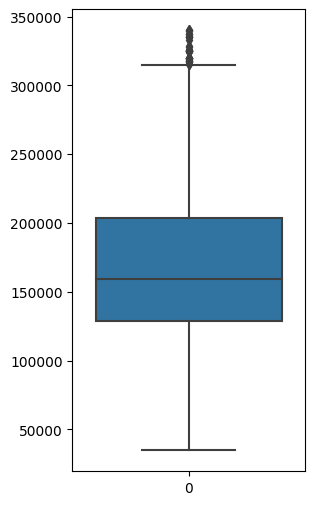

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['SalePrice'])

###YearBuilt

<Axes: >

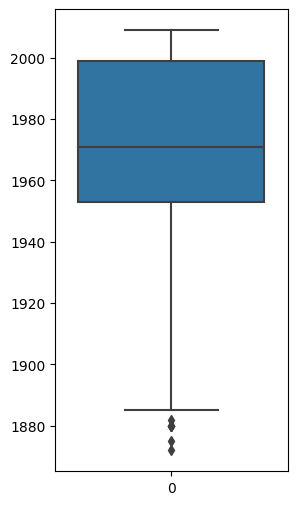

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['YearBuilt'])

Pada fitur YearBuilt terdapat nilai outlier diluar batas nilai minimum

IMPUTATION

In [ ]:
#Hitung nilai median dari atribut YearBuilt
median_year_built = df['YearBuilt'].median()

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#Imputasi outlier dengan nilai median
data_imputasi = df.loc[(df['YearBuilt'] < lower_bound) | (df['YearBuilt'] > upper_bound), 'YearBuilt'] = median_year_built

### GrLivArea

<Axes: >

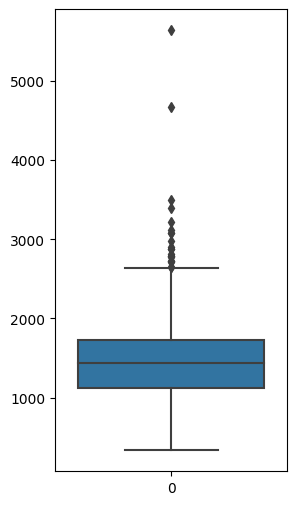

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['GrLivArea'])

Pada fitur GrLivArea terdapat nilai outlier diluar batas nilai maksimum

IMPUTATION

In [ ]:
#Hitung nilai median dari atribut YearBuilt
mean_grade_living = df['GrLivArea'].mean()

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#Imputasi outlier dengan nilai mean
df.loc[(df['GrLivArea'] < lower_bound) | (df['GrLivArea'] > upper_bound), 'GrLivArea'] = mean_grade_living

###LotArea

<Axes: >

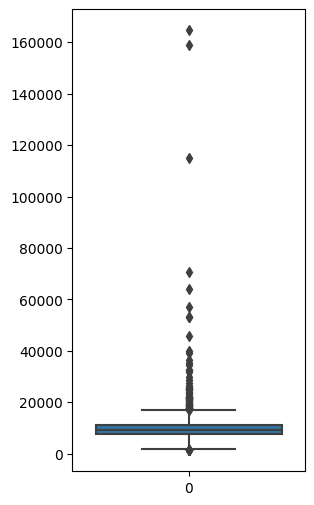

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(data=df['LotArea'])

Pada fitur LotArea terdapat nilai outlier diluar batas nilai minimum dan maksimum

IMPUTATION

In [ ]:
#Hitung nilai mean dari atribut YearBuilt
mean_grade_living = df['LotArea'].mean()

In [ ]:
#Tentukan batas bawah dan batas atas untuk outlier
Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
#Imputasi outlier dengan nilai mean
df.loc[(df['LotArea'] < lower_bound) | (df['LotArea'] > upper_bound), 'LotArea'] = mean_grade_living

##Encoding

In [ ]:
#Definisikan kategori ke nilai numerik
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

#Label Encoding untuk semua kolom ordinal
df_encoded_qual = df.apply(lambda col: col.map(mapping))

pd.set_option('display.max_columns', 100)
df_encoded_qual.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,4,3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fitur fitur yang kategorikal ordinal menjadi diubah menjadi nilai numerik. Pada dataset ini, fitur yang bernilai Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (None) diubah menjadi tipe numerik 0, 1, 2, 3, 4, dan 5.

In [ ]:
df['CentralAirEncoding'] = df['CentralAir'].map({'N': 0, 'Y': 1})
df['CentralAirEncoding'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAirEncoding, dtype: int64

Mengubah nilai pada fitur CentralAir yang bertipe kategorikal Y (Yes) dan N (No) menjadi tipe numerik 1 dan 0 dimana 0 (N/No) dan 1 (Y/Yes).

#FEATURE ENGINEERING

Berikut ini merupakan fitur fitur baru yang dbuat berdasarkan fitur yang sebelumnya telah ada

## 1) Usia Rumah saat terjual

In [ ]:
df['AgeSold'] = df['YrSold'] - df['YearBuilt']
df['AgeSold'].head(10)

0     5
1    31
2     7
3    91
4     8
5    16
6     3
7    36
8    77
9    69
Name: AgeSold, dtype: int64

Dengan melakukan pengurangan antara tahun rumah terjual dan tahun rumah dibangun, menghasilkan fitur baru yaitu **usia rumah saat terjual**

## 2) Usia Rumah (sekarang)

In [ ]:
now = datetime.now().year
df['AgeHouse'] = now - df['YearBuilt']
df['AgeHouse'].head(10)

0     20
1     47
2     22
3    108
4     23
5     30
6     19
7     50
8     92
9     84
Name: AgeHouse, dtype: int64

Memanfaatkan package datetime, dapat menghasilkan informasi baru yaitu **usia rumah saat ini** dengan melakukan pengurangan antara tahun saat ini dan tahun saat rumah dibangun. Informasi ini sangat bermanfaat bagi pembeli karena dapat mengetahui selama apa rumah tersebut telah dibangun.

## 3) Jarak waktu rumah dibangun dan direnovasi

In [ ]:
df['RenovatedTime'] = df['YearRemodAdd'] - df['YearBuilt']
df['RenovatedTime'].head(10)

0     0
1     0
2     1
3    55
4     0
5     2
6     1
7     0
8    19
9    11
Name: RenovatedTime, dtype: int64

Dengan melakukan pengurangan tahun rumah direnovasi dan tahun rumah dibangun, kita dapat mengetahui dalam **rentang berapa tahun rumah tersebut di renovasi** semenjak dibangun. Informasi ini berguna bagi penjual dan agen properti agar bisa mengambil keputusan apakah rumah tersebut masih layak atau perlu direnovasi ulang.

## 4) Sisa Lahan

In [ ]:
df['GardenArea'] = df['LotArea'] - df['GrLivArea']
df['GardenArea'].head(10)

0     6740.0
1     8338.0
2     9464.0
3     7833.0
4    12062.0
5    12753.0
6     8390.0
7     8292.0
8     4346.0
9     6343.0
Name: GardenArea, dtype: float64

Dengan melakukan pengurangan antara luas area lot dan ruang tamu di area pekarangan, kita dapat mengetahui **luas lahan yang tersisa** yang bisa dimanfaatkan untuk area lain seperti taman

## 5) Total Kamar Mandi

In [ ]:
df['TotalBath'] = df['BsmtFullBath'] + df['FullBath'] + df['BsmtHalfBath'] + df['HalfBath']
df['TotalBath'].head(10)

0    4
1    3
2    4
3    2
4    4
5    3
6    3
7    4
8    2
9    2
Name: TotalBath, dtype: int64

Dengan menjumlahkan seluruh kamar mandi, pembeli dapat mengetahui rumah mana yang memiliki jumlah kamar mandi sesuai dengan kebutuhannya

## 6) Jumlah Lantai

In [ ]:
df['TotalFlr'] = (df['1stFlrSF'] > 0).astype(int) + (df['2ndFlrSF'] > 0).astype(int)
df['TotalFlr'].head(10)

0    2
1    1
2    2
3    2
4    2
5    2
6    1
7    2
8    2
9    1
Name: TotalFlr, dtype: int64

Fitur ini dibuat untuk mengetahui apakah rumah tersebut hanya memiliki 1 lantai atau lebih. Informasi ini bermanfaat bagi penjual maupun pembeli. Bagi penjual, informasi ini dapat membantu mengambil keputusan terkait harga rumah yang sesuai dengan jumlah lantainya. Bagi pembeli, jumlah lantai rumah tersebut dapat dijadikan pertimbangan dalam sesuai kebutuhannya.

## 7) Rasio basement terhadap luas keseluruhan

In [ ]:
df['BasementRatio'] = ((df['TotalBsmtSF'] / df['LotArea']) *100).round(2).astype(str) + '%'
df['BasementRatio'].head(10)

0    10.13%
1    13.15%
2     8.18%
3     7.92%
4     8.03%
5     5.64%
6    16.72%
7    10.66%
8    15.56%
9    13.36%
Name: BasementRatio, dtype: object

Fitur ini digunakan mengetahui sejauh mana luas basement mempengaruhi luas keseluruhan properti yang bermanfaat bagi penjual dalam mengambil keputusan terkait harga rumah

## 8) Konversi tanggal lengkap

In [ ]:
df['DateConversion'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-1')
df['DateConversion'].head(10)

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
5   2009-10-01
6   2007-08-01
7   2009-11-01
8   2008-04-01
9   2008-01-01
Name: DateConversion, dtype: datetime64[ns]

Konversi tanggal ini memudahkan kita dalam melihat pada bulan dan tahun berapa rumah tersebut terjual

## 9) Rata Rata Kualitas

In [ ]:
df['AverageQual'] = df_encoded_qual[['ExterQual', 'BsmtQual', 'KitchenQual', 'HeatingQC']].mean(axis=1)
df['AverageQual'].head

<bound method NDFrame.head of 0       4.25
1       3.75
2       4.25
3       3.50
4       4.25
        ... 
1455    3.75
1456    3.25
1457    4.25
1458    3.50
1459    3.50
Name: AverageQual, Length: 1399, dtype: float64>

Ini merupakan nilai kategorikal ordinal yang sebelumnya di encode dengan label encoding. Fitur ini berguna untuk melihat nilai dari rata rata kualitas dari beberapa fitur, yaitu ExterQual, BsmtQual, KitchenQual, dan HeatingQC yang dapat berpengaruh terhadap harga jual rumah

## 10) Jumlah Fasilitas Rumah

In [ ]:
df['TotalFacil'] = df[['Fireplaces', 'PoolArea', 'CentralAirEncoding']].sum(axis=1)
df['TotalFacil'].head(10)

0    1
1    2
2    2
3    2
4    2
5    1
6    2
7    3
8    3
9    3
Name: TotalFacil, dtype: int64

Fitur ini memberikan informasi terkait jumlah fasilitas yang dimiliki rumah tersebut, apakah rumah tersebut memiliki FirePlace, PoolArea, CentralAir, atau bahkan ketiganya.

In [ ]:
# setelah beberapa fitur dbuat, mari kita cek datasetnya
pd.set_option('display.max_columns', 100)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAirEncoding,AgeSold,AgeHouse,RenovatedTime,GardenArea,TotalBath,TotalFlr,BasementRatio,DateConversion,AverageQual,TotalFacil
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,5,20,0,6740.0,4,2,10.13%,2008-02-01,4.25,1
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1,31,47,0,8338.0,3,1,13.15%,2007-05-01,3.75,2
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,7,22,1,9464.0,4,2,8.18%,2008-09-01,4.25,2
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,91,108,55,7833.0,2,2,7.92%,2006-02-01,3.50,2
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,8,23,0,12062.0,4,2,8.03%,2008-12-01,4.25,2


In [ ]:
# cek jumlah baris dan kolom setelah penambahan fitur
df.shape

(1399, 88)

##Mengukur Signifikansi Fitur

Mengukur signifikansi antara fitur fitur terhadap target menggunakan Heatmap Korelasi

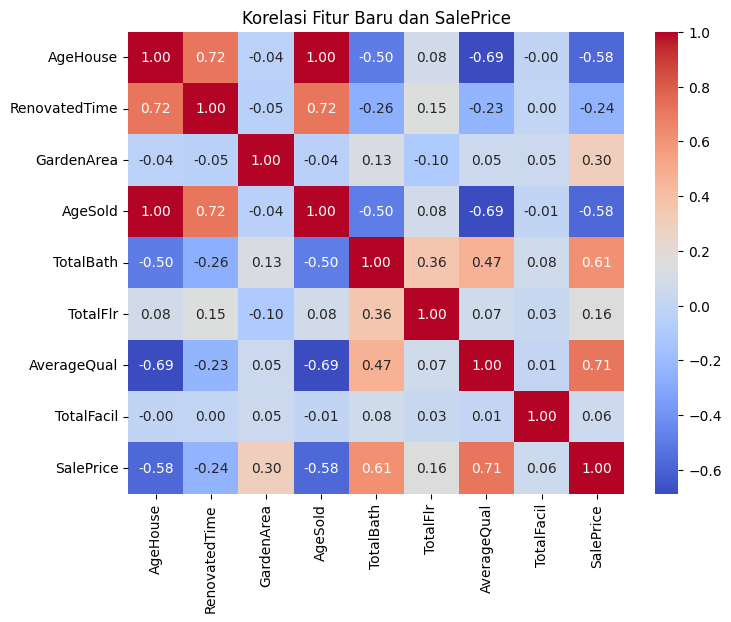

In [ ]:
new_features = ["AgeHouse", "RenovatedTime", "GardenArea", "AgeSold",
                "TotalBath", "TotalFlr", "AverageQual", "TotalFacil"]
correlation_matrix = df[new_features + ["SalePrice"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Fitur Baru dan SalePrice")
plt.show()

 Berdasarkan test korelasi, dapat diketahui bahwa ada hubungan positif antara AverageQual (0.71), TotalFlr (0.16), TotalBath (0.61), dan GardenArea (0.30) terhadap harga rumah.

Korelasi yang paling kuat yaitu AverageQual terhadap SalePrice (0.71) dan TotalBath terhadap SalePrice (0.61).

Selain itu juga terdapat fitur yang berkolerasi tinggi dengan fitur yang bukan target yaitu antara fitur AgeHouse  dan AgeSold, karena terjadi multikolinearitas maka salah satu fitur harus dihapus


In [ ]:
# hapus fitur AgeSold
df = df.drop('AgeSold', axis=1)

In [ ]:
# cek kembali jumlah baris dan kolom
df.shape

(1399, 87)

In [ ]:
# memanggil hanya fitur fitur baru

df1 = df.iloc[:, -11:]
df1.head()

,SalePrice,CentralAirEncoding,AgeHouse,RenovatedTime,GardenArea,TotalBath,TotalFlr,BasementRatio,DateConversion,AverageQual,TotalFacil
0,208500,1,20,0,6740.0,4,2,10.13%,2008-02-01,4.25,1
1,181500,1,47,0,8338.0,3,1,13.15%,2007-05-01,3.75,2
2,223500,1,22,1,9464.0,4,2,8.18%,2008-09-01,4.25,2
3,140000,1,108,55,7833.0,2,2,7.92%,2006-02-01,3.50,2
4,250000,1,23,0,12062.0,4,2,8.03%,2008-12-01,4.25,2


In [ ]:
df1.tail()

,SalePrice,CentralAirEncoding,AgeHouse,RenovatedTime,GardenArea,TotalBath,TotalFlr,BasementRatio,DateConversion,AverageQual,TotalFacil
1455,175000,1,24,1,6270.0,3,2,12.04%,2007-08-01,3.75,2
1456,210000,1,45,10,11102.0,3,1,11.7%,2010-02-01,3.25,3
1457,266500,1,82,65,6702.0,2,2,12.74%,2010-05-01,4.25,3
1458,142125,1,73,46,8639.0,2,1,11.09%,2010-04-01,3.50,1
1459,147500,1,58,0,8681.0,3,1,12.64%,2008-06-01,3.50,1


In [ ]:
# cek jumlah row dan column
df1.shape

(1399, 11)

#NEW FEATURES

In [ ]:
# Melihat columns apa saja yang ada dalam  dataset
df1.columns

Index(['SalePrice', 'CentralAirEncoding', 'AgeHouse', 'RenovatedTime',
       'GardenArea', 'TotalBath', 'TotalFlr', 'BasementRatio',
       'DateConversion', 'AverageQual', 'TotalFacil'],
      dtype='object')

In [ ]:
df1.describe()

,SalePrice,CentralAirEncoding,AgeHouse,RenovatedTime,GardenArea,TotalBath,TotalFlr,AverageQual,TotalFacil
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,170237.127234,0.932094,52.456040,13.514653,7722.891934,2.379557,1.429593,3.611330,3.997856
std,59230.130817,0.251674,29.295777,23.736745,2875.442702,0.897244,0.495195,0.553131,38.355492
min,34900.000000,0.000000,14.000000,-21.000000,378.000000,1.000000,1.000000,2.250000,0.000000
25%,129000.000000,1.000000,24.000000,0.000000,6256.000000,2.000000,1.000000,3.000000,1.000000
50%,159500.000000,1.000000,52.000000,0.000000,7907.000000,2.000000,1.000000,3.500000,1.000000
75%,203500.000000,1.000000,70.000000,21.500000,9348.500000,3.000000,2.000000,4.250000,2.000000
max,340000.000000,1.000000,138.000000,110.000000,15608.000000,6.000000,2.000000,5.000000,740.000000


Harga rumah ini dari range 34900 sampai 755000 dengan rata-rata harga rumah 163000. Sebaran harga rumahnya yaitu right skew, terlihat dari nilai mean > mediannya.

# FEATURE SELECTION

Pemilihan fitur yang akan dimasukkan ke dalam model. Hanya 2 fitur yang akan dimasukkan ke dalam model regresi karena fitur ini yang memiliki hubungan yang kuat dengan variabel target. Fitur-fitur tersebut adalah AverageQual (0.72), dan TotalBath (0.61).

#MODEL DEVELOPMENT

In [ ]:
#pisahkan varible X dan Y, dimana X diisi oleh variable yang dibutuhkan aja yang udah kita tentukan di feature selection
x = df1[['AverageQual','TotalBath']]

In [ ]:
y = pd.DataFrame(df1['SalePrice'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
x

,AverageQual,TotalBath
0,4.25,4
1,3.75,3
2,4.25,4
3,3.50,2
4,4.25,4
...,...,...
1455,3.75,3
1456,3.25,3
1457,4.25,2
1458,3.50,2


In [ ]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
# 80% data untuk dilatih
x_train

,AverageQual,TotalBath
546,3.75,2
130,3.75,3
1378,3.00,2
1405,4.50,4
1450,3.25,4
...,...,...
754,3.50,2
951,3.25,2
1146,3.75,3
245,3.50,3


##Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

 Penskalaan data pada data latih (x_train) dan data uji (x_test) menggunakan StandardScaler

In [ ]:
#menampilkan dataset X_train setelah di scaling
np.set_printoptions(suppress=True)
print(x_train[:10])

[[ 0.24178048 -0.43683273]
 [ 0.24178048  0.68173894]
 [-1.1064871  -0.43683273]
 [ 1.59004806  1.80031061]
 [-0.65706457  1.80031061]
 [-0.20764204 -1.55540439]
 [-0.20764204 -1.55540439]
 [-0.20764204 -0.43683273]
 [-0.20764204  0.68173894]
 [-0.65706457  0.68173894]]


In [ ]:
print(y_train[:10])

      SalePrice
546      210000
130      226000
1378      83000
1405     275000
1450     136000
1197     144000
896      106500
1005     149900
93       133900
660      197900


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(x_train, y_train)

<ipython-input-69-17fa5d2b49ce>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

Membuat model regresi Random Forest menggunakan scikit-learn

In [ ]:
# with function ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

 Mengalisis pentingnya fitur (feature importance) dalam model machine learning

In [ ]:
rfc_fimp = pd.Series(rf.feature_importances_, index = x.columns)
rfc_fimp.sort_values(ascending=False)

AverageQual    0.774182
TotalBath      0.225818
dtype: float64

Nilai 0.77 pada fitur AverageQual dan 0.22 pada fitur TotalBath menggambarkan sejauh mana kedua fitur tersebut berkontribusi dalam menjelaskan variabilitas dalam target SalePrice.

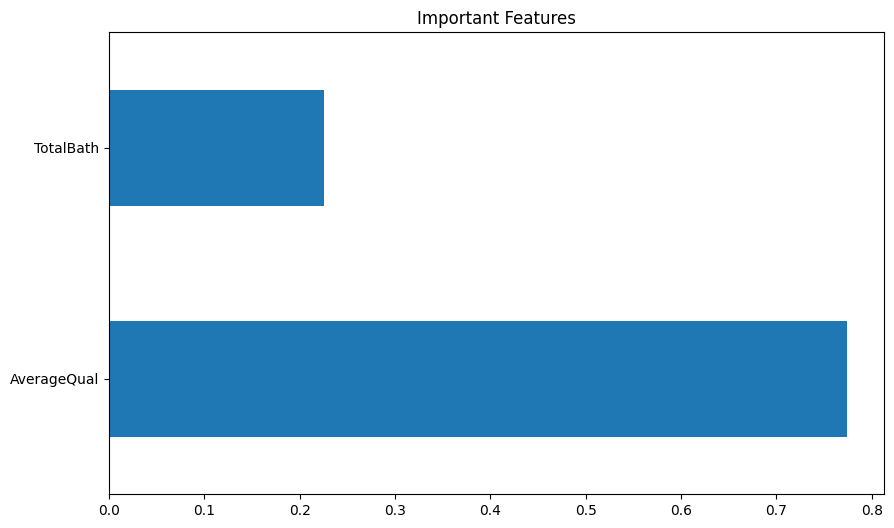

In [ ]:
plt.figure(figsize=(10,6))
rfc_fimp.nlargest(30).sort_values(ascending=False).plot(kind='barh')
round(rfc_fimp,4)*100
plt.title('Important Features',size=12)
plt.show()

Perbandingan dua fitur penting yang divisualisasikan dalam plot

## Linear Regression

In [ ]:
#Model linear regression untuk memprediksi nilai harga rumah
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#untuk memprediksi
ypred_lr = model.predict(x_test)

In [ ]:
#hasil prediksi y
ypred_lr

array([[210171.14631937],
       [202839.18291086],
       [225550.73492068],
       [225550.73492068],
       [248262.2869305 ],
       [103229.68789446],
       [202839.18291086],
       [248262.2869305 ],
       [156700.41710691],
       [125941.23990428],
       [103229.68789446],
       [156700.41710691],
       [141320.8285056 ],
       [210171.14631937],
       [125941.23990428],
       [103229.68789446],
       [179411.96911674],
       [225550.73492068],
       [225550.73492068],
       [141320.8285056 ],
       [202839.18291086],
       [172080.00570823],
       [194791.55771805],
       [103229.68789446],
       [179411.96911674],
       [225550.73492068],
       [103229.68789446],
       [164032.38051542],
       [125941.23990428],
       [156700.41710691],
       [156700.41710691],
       [156700.41710691],
       [256309.91212331],
       [263641.87553182],
       [202123.52112656],
       [103229.68789446],
       [125941.23990428],
       [225550.73492068],
       [2255

In [ ]:
# makin tinggi makin bagus akurasinya
display(model.score(x_test, y_test))

0.6150577525942031

Nilai 0.6150577525942031 mengindikasikan bahwa model memiliki tingkat akurasi sekitar 61.50% pada data uji

### Evaluate Model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Menghitung beberapa metrik evaluasi model yang umum digunakan untuk mengukur kinerja model regresi

In [ ]:
mse_lr = mean_squared_error(y_test, ypred_lr).round(2)
mae_lr = mean_absolute_error(y_test, ypred_lr).round(2)
rmse_lr = np.sqrt(mean_squared_error(y_test, ypred_lr)).round(2) #akar mse

print('MSE : ', mse_lr)
print('MAE : ', mae_lr)
print('RMSE : ', rmse_lr)

MSE :  1352498366.83
MAE :  27891.44
RMSE :  36776.33


Model regresi memiliki beberapa tingkat kesalahan dalam memprediksi nilai target. Nilai metrik evaluasi model yang tinggi menunjukkan bahwa kesalahan prediksi cukup besar

### R-Square

In [ ]:
#menghitung r2 dengan pembulatan 2 angka setelah koma
r2_lr = r2_score(y_test,ypred_lr).round(2)
r2_lr

0.62

Model regresi linear hanya memiliki akurasi 62%. Artinya 62%  (AverageQual dan TotalBath) mampu menjelaskan keragaman datanya, sisanya 38% dapat dijelaskan oleh variabel lain di luar model. Model regresi cukup baik jika R2 >= 75%.

Sumber Referensi:
- Mentoring 14 -  Supervised (Regression) & Unsupervised Learning (Clustering)
- Mentoring 9 - Feature Engineering
- Mentoring 8 - EDA dan Data Preprosessing
- Live Session 8 - 15
- Modul Chapter 3 Data Processing - Startup Campus
- https://www.w3schools.com/statistics/statistics_quartiles_and_percentiles.php
- https://www.dicoding.com/academies/615/tutorials/33103